#### Functional API 

In [97]:
import os 
import sys 
import cv2 
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import albumentations as at 
import matplotlib.pyplot as plt 

In [98]:
from IPython.display import SVG
from tensorflow.keras.datasets import mnist 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Activation, Dense, Input, Flatten, Dropout 
from tensorflow.keras.utils import to_categorical, Sequence, model_to_dot, plot_model

In [99]:
def get_show_shape(images):
    for i in range(len(images)):
        print(f"shape {images[i].shape}")

In [100]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [101]:
get_show_shape([x_train, y_train, x_test, y_test])

shape (60000, 28, 28)
shape (60000,)
shape (10000, 28, 28)
shape (10000,)


In [102]:
s_model = Sequential([
                      Flatten(input_shape=(28, 28)),
                      Dense(256, activation="relu"),
                      Dense(64, activation="relu"),
                      Dense(32, activation="relu"),
                      Dense(10, activation="softmax")
])

s_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_36 (Flatten)        (None, 784)               0         
                                                                 
 dense_109 (Dense)           (None, 256)               200960    
                                                                 
 dense_110 (Dense)           (None, 64)                16448     
                                                                 
 dense_111 (Dense)           (None, 32)                2080      
                                                                 
 dense_112 (Dense)           (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [103]:
input_tensor = Input(shape = (28, 28), name="input_tensor")
x = Flatten()(input_tensor)
x = Dense(256, activation="relu")(x)
x = Dense(64, activation="relu")(x)
output = Dense(10, activation="softmax")(x)

f_model = Model(inputs=input_tensor, outputs=output)

f_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_tensor (InputLayer)   [(None, 28, 28)]          0         
                                                                 
 flatten_37 (Flatten)        (None, 784)               0         
                                                                 
 dense_113 (Dense)           (None, 256)               200960    
                                                                 
 dense_114 (Dense)           (None, 64)                16448     
                                                                 
 dense_115 (Dense)           (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


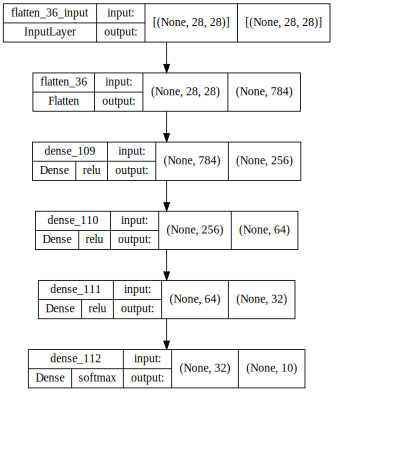

In [104]:
SVG(model_to_dot(s_model, show_shapes=True, show_layer_activations=True, dpi=60).create(prog="dot", format="svg")) 

In [105]:
class MyModel1(Model):
    def __init__(self):
        super(MyModel1, self).__init__()

        self.flatten = Flatten()
        self.dense1 = Dense(256, activation="relu")
        self.dense2 = Dense(64, activation="relu")
        self.dense3 = Dense(10, activation="softmax")
    
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)

        return x 

In [106]:
mymodel1 = MyModel1()
mymodel1._name = "subclss_model1"
mymodel1(Input(shape=(28, 28)))
mymodel1.summary()


Model: "subclss_model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_38 (Flatten)        multiple                  0         
                                                                 
 dense_116 (Dense)           multiple                  200960    
                                                                 
 dense_117 (Dense)           multiple                  16448     
                                                                 
 dense_118 (Dense)           multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [107]:
class MyModel2(Model):
    def __init__(self, units, num_classes):
        super(MyModel2, self).__init__()
        self.flatten = Flatten()
        self.dense1 = Dense(units, activation="relu")
        self.dense2 = Dense(units/4, activation="relu")
        self.dense3 = Dense(num_classes, activation="relu")
    
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x 

In [108]:
mymodel2 = MyModel2(256, 10)

mymodel2._name = "subclss_model2"
mymodel2(Input(shape=(28, 28)))
mymodel2.summary()



Model: "subclss_model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_39 (Flatten)        multiple                  0         
                                                                 
 dense_119 (Dense)           multiple                  200960    
                                                                 
 dense_120 (Dense)           multiple                  16448     
                                                                 
 dense_121 (Dense)           multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
